# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [436]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

## Global attributes
Define the global attributes

In [437]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'

input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']

You can add your own global attributes here


## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [438]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))


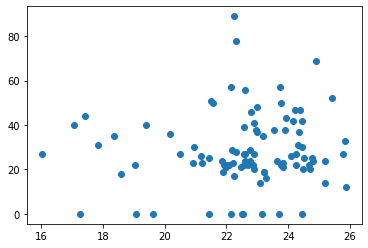

In [439]:
temperatureA = list()
caseA = list()
temperatureB = list()
caseB = list()
temperatureC = list()
caseC = list()
#For temperatureA and caseA which deal with the data that not fit
for i in range(1,105):
  if input_datalist[i][1] != '' and float(input_datalist[i][1]) > 15 and float(input_datalist[i][1]) < 40: 
    temperatureA.append(float(input_datalist[i][1]))
    caseA.append(int(input_datalist[i][4]))
#For temperatureB and caseB which deal with the data that not fit
for j in range(1,105):
  if input_datalist[j][2] != '' and float(input_datalist[j][2]) > 15 and float(input_datalist[j][2]) < 40: 
    temperatureB.append(float(input_datalist[j][2]))
    caseB.append(int(input_datalist[j][5]))
#For temperatureC and caseC which deal with the data that not fit
for k in range(1,105):
  if input_datalist[k][3] != '' and float(input_datalist[k][3]) > 15 and float(input_datalist[k][3]) < 40: 
    temperatureC.append(float(input_datalist[k][3]))
    caseC.append(int(input_datalist[k][6]))
plt.scatter(temperatureB, caseB)
#plt.scatter(temperatureC, caseC)

In [440]:
ans=[   
  [0,0,0,0],
  [0,0,0,0],
  [0,0,0,0] ]
#Parameters
alpha=0.00001 #learning rate
repeats=1000

#Initializing variables
w=[0,0,0,0] #w0,w1,w2,w3
error=[0,0,0,0]

cases_before=2
training_amountA = int((len(caseA)-10)*0.7)
training_amountB = int((len(caseB)-10)*0.7)
training_amountC = int((len(caseC)-10)*0.7)-3
print(training_amountA)
print(training_amountB)
print(training_amountC)
for j in range(repeats):
  error[0]=0
  error[1]=0
  error[2]=0
  error[3]=0
  for i in range(cases_before, training_amountA):
    predict=w[0]+(temperatureA[i]*w[1])+(caseA[i-1]*w[2])+(caseA[i-2]*w[3])
    error[0]=error[0]+(predict-caseA[i])
    error[1]=error[1]+(predict-caseA[i])*temperatureA[i]
    error[2]=error[2]+(predict-caseA[i])*caseA[i-1]
    error[3]=error[3]+(predict-caseA[i])*caseA[i-2]
  
  for k in range(cases_before+2):
    w[k]=w[k]-(alpha*error[k]/(training_amountA-cases_before))
for i in range(4):
  ans[0][i]=w[i]
  w[i]=0

for j in range(repeats):
  error[0]=0
  error[1]=0
  error[2]=0
  error[3]=0
  for i in range(cases_before, training_amountB):
    predict=w[0]+(temperatureB[i]*w[1])+(caseB[i-1]*w[2])+(caseB[i-2]*w[3])
    error[0]=error[0]+(predict-caseB[i])
    error[1]=error[1]+(predict-caseB[i])*temperatureB[i]
    error[2]=error[2]+(predict-caseB[i])*caseB[i-1]
    error[3]=error[3]+(predict-caseB[i])*caseB[i-2]
  
  for k in range(cases_before+2):
    w[k]=w[k]-(alpha*error[k]/(training_amountB-cases_before))
for i in range(4):
  ans[1][i]=w[i]
  w[i]=0

for j in range(repeats):
  error[0]=0
  error[1]=0
  error[2]=0
  error[3]=0
  for i in range(cases_before, training_amountC):
    predict=w[0]+(temperatureC[i]*w[1])+(caseC[i-1]*w[2])+(caseC[i-2]*w[3])
    error[0]=error[0]+(predict-caseC[i])
    error[1]=error[1]+(predict-caseC[i])*temperatureC[i]
    error[2]=error[2]+(predict-caseC[i])*caseC[i-1]
    error[3]=error[3]+(predict-caseC[i])*caseC[i-2]
  
  for k in range(cases_before+2):
    w[k]=w[k]-(10*alpha*error[k]/(training_amountC-cases_before))
for i in range(4):
  ans[2][i]=w[i]
  w[i]=0

print(ans[0])
print(ans[1])
print(ans[2])


58
60
55
[0.01354700523862917, 0.2227600684538959, 0.5842791057833887, 0.25476281696855885]
[0.013403763285910125, 0.2591941262866632, 0.37942288717096107, 0.40382475923064265]
[0.017847732316306337, 0.24381083549051738, 0.36155106084087363, 0.08572388639752754]


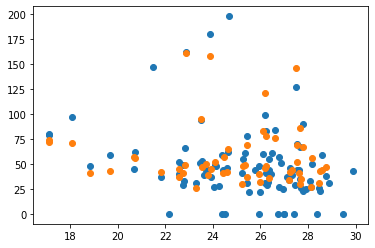

In [441]:
tempA=[]
predicts=[]
for i in range(cases_before, training_amountA):
  predict=ans[0][0]+(temperatureA[i]*ans[0][1])+(caseA[i-1]*ans[0][2])+(caseA[i-2]*ans[0][3])
  predicts.append(predict)
  tempA.append(temperatureA[i])

plt.scatter(temperatureA, caseA)
plt.scatter(tempA, predicts)

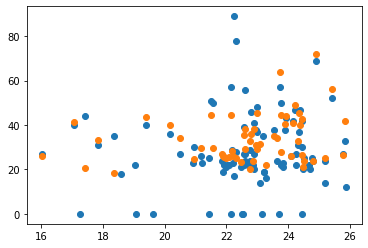

In [442]:
tempB=[]
predicts=[]
for i in range(cases_before, training_amountB):
  predict=ans[1][0]+(temperatureB[i]*ans[1][1])+(caseB[i-1]*ans[1][2])+(caseB[i-2]*ans[1][3])
  predicts.append(predict)
  tempB.append(temperatureB[i])

plt.scatter(temperatureB, caseB)
plt.scatter(tempB, predicts)

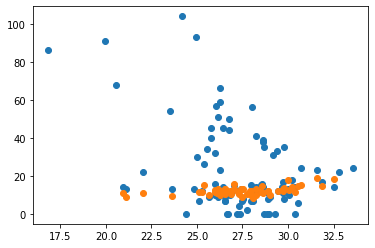

In [443]:
tempC=[]
predictsC=[]
for i in range(cases_before, training_amountC):
  predict=ans[2][0]+(temperatureC[i]*ans[2][1])+(caseC[i-1]*ans[2][2])+(caseC[i-2]*ans[2][3])
  predictsC.append(predict)
  tempC.append(temperatureC[i])

plt.scatter(temperatureC, caseC)
plt.scatter(tempC, predictsC)

In [444]:
mape_train = 0
for i in range(cases_before, training_amountA):
    predict=ans[0][0]+(temperatureA[i]*ans[0][1])+(caseA[i-1]*ans[0][2])+(caseA[i-2]*ans[0][3])
    #print("temp: %2f" %temperatureA[i])
    #print("cases: %2f" %caseA[i])
    #print("predict cases: %2f" %predict)
    dis = (caseA[i] - predict) / caseA[i]
    if dis < 0:
        dis = -dis
    mape_train += dis
mape_train = mape_train*100/training_amountA
print(str(mape_train) + "%")

17.468089899351156%


In [445]:
mape_train = 0
for i in range(cases_before, training_amountB):
    predict=ans[1][0]+(temperatureB[i]*ans[1][1])+(caseB[i-1]*ans[1][2])+(caseB[i-2]*ans[1][3])
    dis = (caseB[i] - predict) / caseB[i]
    if dis < 0:
        dis = -dis
    mape_train += dis
mape_train = mape_train*100/training_amountB
print(str(mape_train) + "%")

17.28014415039529%


In [446]:
mape_train = 0
for i in range(cases_before, training_amountA):
    predict=ans[2][0]+(temperatureC[i]*ans[2][1])+(caseC[i-1]*ans[2][2])+(caseC[i-2]*ans[2][3])
    dis = (caseC[i] - predict) / caseC[i]
    if dis < 0:
        dis = -dis
    mape_train += dis
mape_train = mape_train*100/training_amountC
print(str(mape_train) + "%")

39.31700504504128%


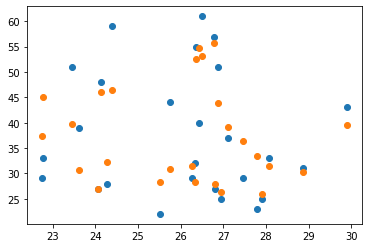

In [447]:
test_temp=[]
test_case=[]
r_test_case=[]
for i in range(training_amountA, len(temperatureA)-10):
  predict=ans[0][0]+(temperatureA[i]*ans[0][1])+(caseA[i-1]*ans[0][2])+(caseA[i-2]*ans[0][3])
  test_case.append(predict)
  test_temp.append(temperatureA[i])
  r_test_case.append(caseA[i])

plt.scatter(test_temp, r_test_case)
plt.scatter(test_temp, test_case)

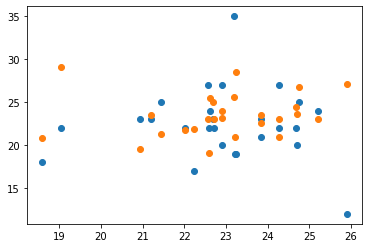

In [448]:
test_temp=[]
test_case=[]
r_test_case=[]
for i in range(training_amountB, len(temperatureB)-10):
  predict=ans[1][0]+(temperatureB[i]*ans[1][1])+(caseB[i-1]*ans[1][2])+(caseB[i-2]*ans[1][3])
  test_case.append(predict)
  test_temp.append(temperatureB[i])
  r_test_case.append(caseB[i])

plt.scatter(test_temp, r_test_case)
plt.scatter(test_temp, test_case)

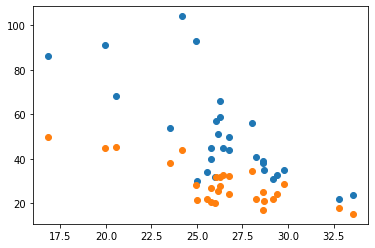

In [449]:
test_temp=[]
test_case=[]
r_test_case=[]
for i in range(training_amountC, len(temperatureC)-10):
  predict=ans[2][0]+(temperatureC[i]*ans[2][1])+(caseC[i-1]*ans[2][2])+(caseC[i-2]*ans[2][3])
  test_case.append(predict)
  test_temp.append(temperatureC[i])
  r_test_case.append(caseC[i])

plt.scatter(test_temp, r_test_case)
plt.scatter(test_temp, test_case)

In [461]:
mape_test = 0
count=0
for i in range(training_amountA, len(temperatureA)-10):
    predict=ans[0][0]+(temperatureA[i]*ans[0][1])+(caseA[i-1]*ans[0][2])+(caseA[i-2]*ans[0][3])
    #print("temp: %2f" %temperatureA[i])
    #print("cases: %2f" %caseA[i])
    #print("predict cases: %2f" %predict)
    dis = (caseA[i] - predict) / caseA[i]
    if dis < 0:
        dis = -dis
    mape_test += dis
    count+=1
mape_test = mape_test*100/count
print(str(mape_test) + "%")

15.457756975179091%


In [462]:
mape_test = 0
count=0
for i in range(training_amountB, len(temperatureB)-10):
    predict=ans[1][0]+(temperatureB[i]*ans[1][1])+(caseB[i-1]*ans[1][2])+(caseB[i-2]*ans[1][3])
    dis = (caseB[i] - predict) / caseB[i]
    if dis < 0:
        dis = -dis
    mape_test += dis
    count+=1
mape_test = mape_test*100/count
print(str(mape_test) + "%")

18.127574931363863%


In [464]:
mape_test = 0
count=0
for i in range(training_amountC, len(temperatureC)-10):
    predict=ans[2][0]+(temperatureC[i]*ans[2][1])+(caseC[i-1]*ans[2][2])+(caseC[i-2]*ans[2][3])
    #print("temp: %2f" %temperatureC[i])
    #print("cases: %2f" %caseC[i])
    #print("predict cases: %2f" %predict)
    dis = (caseC[i] - predict) / caseC[i]
    if dis < 0:
        dis = -dis
    mape_test += dis
    count+=1
print(count)
mape_test = mape_test*100/count
print(str(mape_test) + "%")

28
39.92476812271251%


In [453]:
for i in range(10):
  ans_list=list()
  ans_list.append(202143+i)
  indexA=len(temperatureA)-10+i
  indexB=len(temperatureB)-10+i
  indexC=len(temperatureC)-10+i
  predict=ans[0][0]+(temperatureA[indexA]*ans[0][1])+(caseA[indexA-1]*ans[0][2])+(caseA[indexA-2]*ans[0][3])
  caseA[indexA]=predict
  ans_list.append(predict)
  predict=ans[1][0]+(temperatureB[indexB]*ans[1][1])+(caseB[indexB-1]*ans[1][2])+(caseB[indexB-2]*ans[1][3])
  caseB[indexB]=predict
  ans_list.append(predict)
  predict=ans[2][0]+(temperatureC[indexC]*ans[2][1])+(caseC[indexC-1]*ans[2][2])+(caseC[indexC-2]*ans[2][3])
  caseC[indexC]=predict
  ans_list.append(predict)
  output_datalist.append(ans_list)

print(output_datalist)
#need to fix using the 0 case since they are not in data

[[202143, 27.55656189205817, 23.490319334175226, 24.87815796296192], [202144, 28.49117981641053, 24.952667213607995, 19.04187700219727], [202145, 29.697484853613616, 24.80663301470198, 16.032481928436706], [202146, 30.7295136046315, 25.333980753862136, 14.11741674140734], [202147, 30.96709270308943, 25.640980571208168, 13.123159899640822], [202148, 30.865390003385315, 25.529789387376404, 11.924162438906343], [202149, 31.3966625242427, 25.79819480562901, 12.86585897906692], [202150, 32.54547295698773, 24.587672933773526, 12.184380790237979], [202151, 32.804057604941654, 24.703311410888574, 12.667254337761406], [202152, 33.4260254485896, 25.463601279531133, 12.702961246567062]]


## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [ ]:
def SplitData(amount):
  return int(amount*0.3)

### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [ ]:
def PreprocessData():
  

### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [ ]:
def Regression():
  

### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [ ]:
def MakePrediction():
  

### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [454]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)